# Airbnb Listings Analysis using SQL

- 🏆 80 points available
- 🤠 Author: Park (ypark32@illinois.edu)
- ✏️ Last updated on 10/12/2023

---

▶️ First, run the code cell below to import `unittest`, a module used for **🧭 Check Your Work** sections and the autograder.

In [ ]:
# DO NOT MODIFY THE CODE IN THIS CELL
import base64
import unittest
tc = unittest.TestCase()

---

## 💎 Case overview

![Airbnb logo](https://github.com/bdi475/images/blob/main/case-studies/airbnb-sql/airbnb-logo-black-background.png?raw=true)

[Airbnb](https://airbnb.com/) is a popular platform for hosts to accommodate guests with short-term stays and leisure activities. It was born in 2008 when the two founders welcomed three guests to their San Francisco home. Airbnb has grown to serve 4 million hosts in about 100,000 cities. That makes Airbnb's valuation worth more than top three hotel chains combined as of December 2020 ([source](https://www.businessinsider.com/airbnb-ipo-valuation-tops-three-hotel-chains-combined-opening-day-2020-12)).

### ⚔️ Your goal

You have recently joined a property management firm as a business development manager. Your role is to establish and deepen relationships with the property owners. Your success on building relationships largely depends on the firm's ability to offer value-adding services to the property owners.

A common concern that most property owners face is dealing with vacant properties. The traditional approach to to fill up vacant properties is to run paid advertisements or to provide sign-up incentives (e.g., free rent for a month if leased for 13+ months, gift cards, referral bonus, free parking). You have a better idea - why not convert some of the vacant properties into vacation rentals?

In this case study, you'll use SQL analyze all Airbnb listings in the city your firm is operating in. Below are some of the questions you'll be answering.

- 👉 Are there properties that can accommodate more than 8 guests?
- 👉 Are there properties that target guests staying over a month?
- 👉 Are there properties that have more than 5 bedrooms and 3 bathrooms?
- 👉 What are the average price, occupancy (availability), and review score by room type?
- 👉 Can you calculate the metrics of interest (number of listings, average price, average occupancy, average review score) by the number of bedrooms?
- 👉 How about by neighbourhoods? Can you also find the average property dimensions (number of bedrooms & bathrooms)?
- 👉 How do the metrics and dimensions differ between superhost and non-superhost listings?
- 👉 Can you find all listings that were never booked?
- 👉 Can you find the top 15 highest-rated listings?
- 👉 Can you find listings with the keyword "bright"?

Note that looking at *just* the listings data is not sufficient to determine whether converting a vacant property to an Airbnb listing is a good idea. The analysis you perform here is preliminary. If you'd like, you can download additional booking data at [http://insideairbnb.com/get-the-data.html](http://insideairbnb.com/get-the-data.html) to explore further on your own.

---

### 🎯 Part 1: Choose a city 🌄

Guess what - you get to pick your own city! 😺 

Go to [this Google spreadsheet](https://docs.google.com/spreadsheets/d/1Yv3acCW6NYgcwVVo55TcgQ-aXcAsSmoVo_Su79xm9Js/edit?usp=sharing) and mark your NetID in any row where the city has not been taken yet (the selection is based on a first-come, first-served basis). Store the copied URL to a new variable named `file_url`.

#### 🔑 Sample Code
```python
file_url = 'https://github.com/bdi475/datasets/raw/main/case-studies/airbnb-sql/Chicago.csv'
```

In [ ]:
# YOUR CODE BEGINS

# YOUR CODE ENDS

print(f'CSV File URL: {file_url}')

#### 🧭 Check Your Work

Run the code cell below to test your solution.

- ✔️ If the code cell runs without errors, you're good to move on.
- ❌ If the code cell produces an error, review your code and fix any mistakes.

In [ ]:
# DO NOT CHANGE THE CODE IN THIS CELL
_test_case = 'part-01'
_points = 2

import pandas as pd
df_check = pd.read_csv(file_url)

tc.assertEqual(set(df_check.columns), set(['name', 'neighbourhood', 'room_type', 'bedrooms', 'bathrooms', 
                                           'accommodates', 'minimum_nights', 'price', 'availability_365', 
                                           'number_of_reviews', 'review_score', 'latitude', 'longitude', 'is_superhost']))

tc.assertGreater(df_check.shape[0], 100, 'The city should have at least 100 listings')

---

### 🎯 Part 2: Import packages

#### 👇 Tasks

- ✔️ Import the following Python packages.
    1. `pandas`: Use alias `pd`.
    2. `numpy`: Use alias `np`.
    3. `sqlite3`: No alias

In [ ]:
# YOUR CODE BEGINS

# YOUR CODE ENDS

#### 🧭 Check Your Work

Run the code cell below to test your solution.

- ✔️ If the code cell runs without errors, you're good to move on.
- ❌ If the code cell produces an error, review your code and fix any mistakes.

In [ ]:
# DO NOT CHANGE THE CODE IN THIS CELL
_test_case = 'part-02'
_points = 2

import sys

tc.assertIsNotNone(pd.__version__, 'Check whether you have correctly imported Pandas with an alias.')
tc.assertIsNotNone(np.__version__, 'Check whether you have correctly imported NumPy with an alias.')
tc.assertTrue('sqlite3' in globals(), 'Check whether you have correctly imported the sqlite3 package.')

---

### 🔨 Create and populate the `listings` table

▶️ Run the code below to create a new SQLite database. The code will also create and populate the `listings` table.

In [ ]:
# DO NOT CHANGE THE CODE BELOW
# Connect to airbnb.db database file
# If the file does not exist, create a new file
conn = sqlite3.connect('airbnb.db')

# Create a cursor
# A cursor enables users of a DBMS to traverse through the result set
# without having to retrieve all results at once
c = conn.cursor()

# Drop (delete) listings table if it already exists
c.execute('DROP TABLE IF EXISTS listings')
conn.commit()

# Create table
# Triple quotes (''') denote multiline strings
create_table_query = '''
CREATE TABLE IF NOT EXISTS listings (
    name TEXT,
    neighbourhood TEXT,
    room_type TEXT,
    bedrooms REAL,
    bathrooms REAL,
    price REAL,
    accommodates INT,
    minimum_nights INT,
    availability_365 INT,
    number_of_reviews INTEGER,
    review_score REAL,
    is_superhost INT,
    latitude REAL,
    longitude REAL
)
'''
c.execute(create_table_query)
conn.commit()

# Populate the listings table
df_listings = pd.read_csv(file_url)
df_listings.to_sql(name='listings', index=False, con=conn, if_exists='append')

conn.close()

#### 🔬 `listings` table column descriptions

| Column Name         | Description                                                              |
|---------------------|--------------------------------------------------------------------------|
| `name`              | Listing title                                                            |
| `neighbourhood`     | Neighbourhood                                                            |
| `room_type`         | Room type (e.g., Shared room, Private room, Entire home/apt, Hotel room) |
| `bedrooms`          | Number of bedrooms                                                       |
| `bathrooms`         | Number of bathrooms                                                      |
| `accommodates`      | Number of maximum guests                                                 |
| `minimum_nights`    | Number of minimum nights required to book                                |
| `price`             | Base nightly price - the actual price will vary by specific dates        |
| `availability_365`  | Number of available days during the past 365 days                        |
| `number_of_reviews` | Total number of reviews                                                  |
| `review_score`      | Guest feedback rating                                                    |
| `latitude`          | Latitude                                                                 |
| `longitude`         | Longitude                                                                |
| `is_superhost`      | Whether the host is a superhost (0 == not a superhost, 1 == superhost)   |

---

### 🎯 Part 3: Select all columns and rows from the `listings` table

#### 👇 Tasks

- ✔️ Write a query that selects all columns and rows from the `listings` table.
- ✔️ Store your query to a new variable named `query_select_all`.

#### 🔥 Need help?

Refer to the 🚀 **Hint** section below the 🧭 **Check your work** code cell.

In [ ]:
# YOUR CODE BEGINS

# YOUR CODE ENDS

conn = sqlite3.connect('airbnb.db')
df_result = pd.read_sql_query(query_select_all, con=conn)
display(df_result)
conn.close()

#### 🧭 Check Your Work

Run the code cell below to test your solution.

- ✔️ If the code cell runs without errors, you're good to move on.
- ❌ If the code cell produces an error, review your code and fix any mistakes.

In [ ]:
# DO NOT CHANGE THE CODE IN THIS CELL
_test_case = 'part-03'
_points = 3

conn = sqlite3.connect('airbnb.db')
decoded_query = base64.b64decode(b'ClNFTEVDVCAqCkZST00gbGlzdGluZ3MK').decode()
df_check = pd.read_sql_query(decoded_query, con=conn)
tc.assertEqual(df_result.shape, df_check.shape, 'Number of rows and/or columns is different')
conn.close()

#### 🚀 Hint

The query below selects all rows and columns from a database table named `my_table`.

```sql
SELECT *
FROM my_table;
```

---

### 🎯 Part 4: Listings that can accommodate 8 or more people

#### 👇 Tasks

- ✔️ Using the `listings` table, find all listings that can accommodate 8 or more people (`accommodates >= 8`).
- ✔️ Select only the following 5 columns (in the same order):
    - `name`, `room_type`, `bedrooms`, `bathrooms`, `accommodates`
- ✔️ Store your query to a new variable named `query_eight_or_more`.
- ✔️ Sort the result by `accommodates` in descending order.

#### 🔑 Output Format

Your query result will likely have different number of rows and cell values.

|   |                                       name |       room_type | bedrooms | bathrooms | accommodates |
|--:|-------------------------------------------:|----------------:|---------:|----------:|-------------:|
| 0 |   Elegant Rantoul Oasis: 20 mins to campus | Entire home/apt |      5.0 |       4.0 |           14 |
| 1 |         Exquisite 1980's Historic Building | Entire home/apt |      2.0 |       2.0 |           10 |
| 2 | Quiet Area in Urbana - Perfect for Groups! | Entire home/apt |      3.0 |       2.0 |            9 |
| 3 |     Spacious Champaign Apt w/Pool Gym Wifi | Entire home/apt |      1.0 |       1.0 |            8 |

#### 🔥 Need help?

Refer to the 🚀 **Hint** section below the 🧭 **Check your work** code cell.

In [ ]:
# YOUR CODE BEGINS

# YOUR CODE ENDS

conn = sqlite3.connect('airbnb.db')
df_result = pd.read_sql_query(query_eight_or_more, con=conn)
display(df_result)
conn.close()

#### 🧭 Check Your Work

Run the code cell below to test your solution.

- ✔️ If the code cell runs without errors, you're good to move on.
- ❌ If the code cell produces an error, review your code and fix any mistakes.

In [ ]:
# DO NOT CHANGE THE CODE IN THIS CELL
_test_case = 'part-04'
_points = 3

conn = sqlite3.connect('airbnb.db')
decoded_query = base64.b64decode(
b'ClNFTEVDVCBuYW1lLCByb29tX3R5cGUsIGJlZHJvb21zLCBiYXRocm9vbXMsIGFjY29tbW9kYXRlcwp\
GUk9NIGxpc3RpbmdzCldIRVJFIGFjY29tbW9kYXRlcyA+PSA4Ck9SREVSIEJZIGFjY29tbW9kYXRlcyBERVNDCg=='
).decode()
df_check = pd.read_sql_query(decoded_query, con=conn)
tc.assertEqual(df_result.columns.tolist(), df_check.columns.tolist(), 'Incorrect set of columns or order')
tc.assertEqual(df_result.shape, df_check.shape, 'Number of rows and/or columns is different')
pd.testing.assert_series_equal(df_result['accommodates'].reset_index(drop=True),
                               df_check['accommodates'].reset_index(drop=True))
pd.testing.assert_frame_equal(df_result.sort_values(df_result.columns.tolist()).reset_index(drop=True),
                              df_check.sort_values(df_check.columns.tolist()).reset_index(drop=True))

conn.close()

#### 🚀 Hint

The query below selects 5 columns from `my_table` where `column5` is greater than or equal to 8. The result will be sorted by `column5` in descending order.

```sql
SELECT column1, column2, column3, column4, column5
FROM my_table
WHERE column5 >= 8
ORDER BY column5 DESC;
```

---

### 🎯 Part 5: Average price of all listings

#### 👇 Tasks

- ✔️ Using the `listings` table, find the average price of all listings:
- ✔️ Store your query to a new variable named `query_avg_price`.
- ✔️ Result of your query should have only one column and one row.
    - The name of the column does not matter.
    
#### 🔑 Output Format

You are free to rename your `AVG(price)` column.

|   |      AVG(price) |
|--:|----------------:|
| 0 |      145.666667 |

#### 🔥 Need help?

Refer to the 🚀 **Hint** section below the 🧭 **Check your work** code cell.

In [ ]:
# YOUR CODE BEGINS

# YOUR CODE ENDS

conn = sqlite3.connect('airbnb.db')
df_result = pd.read_sql_query(query_avg_price, con=conn)
display(df_result)
conn.close()

#### 🧭 Check Your Work

Run the code cell below to test your solution.

- ✔️ If the code cell runs without errors, you're good to move on.
- ❌ If the code cell produces an error, review your code and fix any mistakes.

In [ ]:
# DO NOT CHANGE THE CODE IN THIS CELL
_test_case = 'part-05'
_points = 4

conn = sqlite3.connect('airbnb.db')
decoded_query = base64.b64decode(
    b'ClNFTEVDVCBBVkcocHJpY2UpCkZST00gbGlzdGluZ3MK'
).decode()
df_check = pd.read_sql_query(decoded_query, con=conn)
tc.assertEqual(df_result.shape, df_check.shape, 'Number of rows and/or columns is different')
tc.assertEqual(df_result.iloc[0, 0], df_check.iloc[0, 0], f'Average price should be {df_check.iloc[0, 0]}')
conn.close()

#### 🚀 Hint

The query below calculates the average of `my_column` in `my_table`.

```sql
SELECT AVG(my_column)
FROM my_table;
```

---

### 🎯 Part 6: Long-term stays

#### 👇 Tasks

- ✔️ Using the `listings` table, find all listings with minimum nights of 30 or more (`minimum_nights >= 30`).
- ✔️ Select only the following 7 columns (in the same order):
    - `name`, `room_type`, `bedrooms`, `bathrooms`, `minimum_nights`, `price`, `review_score`
- ✔️ Store your query to a new variable named `query_long_term_stays`.
- ✔️ Sort the result by `price` in ascending order.

#### 🔑 Output Format

Your query result will likely have different number of rows and cell values.

|   | name                                      | room_type    | bedrooms | bathrooms | minimum_nights | price | review_score |
|---|-------------------------------------------|--------------|----------|-----------|----------------|-------|--------------|
| 0 | Peace within the city for solo travelers  | Private room | 1.0      | 1.0       | 35             | 25.0  | 95.0         |
| 1 | Room close to Downtown Champaign          | Private room | 1.0      | 1.0       | 30             | 33.0  | 95.0         |
| 2 | Perfect spot to work on your next startup | Private room | 1.0      | 1.0       | 30             | 65.0  | 98.0         |

#### 🔥 Need help?

Refer to the 🚀 **Hint** section below the 🧭 **Check your work** code cell.

In [ ]:
# YOUR CODE BEGINS

# YOUR CODE ENDS

conn = sqlite3.connect('airbnb.db')
df_result = pd.read_sql_query(query_long_term_stays, con=conn)
display(df_result)
conn.close()

#### 🧭 Check Your Work

Run the code cell below to test your solution.

- ✔️ If the code cell runs without errors, you're good to move on.
- ❌ If the code cell produces an error, review your code and fix any mistakes.

In [ ]:
# DO NOT CHANGE THE CODE IN THIS CELL
_test_case = 'part-06'
_points = 4

conn = sqlite3.connect('airbnb.db')
decoded_query = base64.b64decode(
b'ClNFTEVDVCBuYW1lLCByb29tX3R5cGUsIGJlZHJvb21zLCBiYXRocm9vbXMsIG1pbmltdW1fbmlnaHRz\
LCBwcmljZSwgcmV2aWV3X3Njb3JlCkZST00gbGlzdGluZ3MKV0hFUkUgbWluaW11bV9uaWdodHMgPj0gMzAKT1JERVIgQlkgcHJpY2UK'
).decode()
df_check = pd.read_sql_query(decoded_query, con=conn)
tc.assertEqual(df_result.columns.tolist(), df_check.columns.tolist(), 'Incorrect set of columns or order')
tc.assertEqual(df_result.shape, df_check.shape, 'Number of rows and/or columns is different')
pd.testing.assert_series_equal(df_result['price'].reset_index(drop=True),
                               df_check['price'].reset_index(drop=True))
pd.testing.assert_frame_equal(df_result.sort_values(df_result.columns.tolist()).reset_index(drop=True),
                              df_check.sort_values(df_check.columns.tolist()).reset_index(drop=True))

conn.close()

#### 🚀 Hint

The query below selects 7 columns from `my_table` where `column5` is greater than or equal to 30. The result will be sorted by `column6` in ascending order.

```sql
SELECT column1, column2, column3, column4, column5, column6, column7
FROM my_table
WHERE column5 >= 30
ORDER BY column6;
```

---

### 🎯 Part 7: Large listings

#### 👇 Tasks

- ✔️ Using the `listings` table, find all rows where the listing has:
    - 6 or more bedrooms
    - **AND** 4 or more bathrooms
- ✔️ Select only the following 5 columns (in the same order):
    - `name`, `bedrooms`, `bathrooms`, `price`, `review_score`
- ✔️ Store your query to a new variable named `query_large_listings`.

#### 🔑 Output Format

Your query result will likely have different number of rows and cell values.


|   |                                   name | bedrooms | bathrooms | price | review_score |
|--:|---------------------------------------:|---------:|----------:|------:|-------------:|
| 0 |     5 min away from Downtown Champaign |      6.0 |       4.0 | 550.4 |         99.0 |
| 1 |   Large Bedroom & Bath close to campus |      6.0 |       5.0 | 483.0 |         98.0 |
| 2 | Big family welcomed, graduation season |      6.0 |       4.5 | 379.9 |         94.0 |
| 3 |                   LARGEST HOME IN TOWN |      8.0 |       7.0 | 600.0 |         93.0 |

#### 🔥 Need help?

Refer to the 🚀 **Hint** section below the 🧭 **Check your work** code cell.

In [ ]:
# YOUR CODE BEGINS

# YOUR CODE ENDS

conn = sqlite3.connect('airbnb.db')
df_result = pd.read_sql_query(query_large_listings, con=conn)
display(df_result)
conn.close()

#### 🧭 Check Your Work

Run the code cell below to test your solution.

- ✔️ If the code cell runs without errors, you're good to move on.
- ❌ If the code cell produces an error, review your code and fix any mistakes.

In [ ]:
# DO NOT CHANGE THE CODE IN THIS CELL
_test_case = 'part-07'
_points = 4

conn = sqlite3.connect('airbnb.db')
decoded_query = base64.b64decode(
b'ClNFTEVDVCBuYW1lLCBiZWRyb29tcywgYmF0aHJvb21zLCBwcmljZSwgcmV2aWV3X3Njb3JlCkZST00gb\
GlzdGluZ3MKV0hFUkUgKGJlZHJvb21zID49IDYpIEFORCAoYmF0aHJvb21zID49IDQpCg=='
).decode()
df_check = pd.read_sql_query(decoded_query, con=conn)
tc.assertEqual(df_result.columns.tolist(), df_check.columns.tolist(), 'Incorrect set of columns or order')
tc.assertEqual(df_result.shape, df_check.shape, 'Number of rows and/or columns is different')
pd.testing.assert_frame_equal(df_result.sort_values(df_result.columns.tolist()).reset_index(drop=True),
                              df_check.sort_values(df_check.columns.tolist()).reset_index(drop=True))
conn.close()

#### 🚀 Hint

The query below selects 5 columns from `my_table` where `column2` is greater than or equal to 6 and `column3` is greater than or equal to 4.

```sql
SELECT column1, column2, column3, column4, column5
FROM my_table
WHERE (column2 >= 6) AND (column3 >= 4);
```

---

### 🎯 Part 8: Average price of large listings

#### 👇 Tasks

- ✔️ Using the `listings` table, find the average price of listings with:
    - 6 or more bedrooms
    - **AND** 4 or more bathrooms
- ✔️ Store your query to a new variable named `query_large_listings_avg_price`.
- ✔️ The result of your query should have only one column and one row.
    - The name of the column does not matter.
    
#### 🔑 Output Format

Your query result may have a different column name.

|   | AVG(price) |
|--:|-----------:|
| 0 |      475.5 |


#### 🔥 Need help?

Refer to the 🚀 **Hint** section below the 🧭 **Check your work** code cell.

In [ ]:
# YOUR CODE BEGINS

# YOUR CODE ENDS

conn = sqlite3.connect('airbnb.db')
df_result = pd.read_sql_query(query_large_listings_avg_price, con=conn)
display(df_result)
conn.close()

#### 🧭 Check Your Work

Run the code cell below to test your solution.

- ✔️ If the code cell runs without errors, you're good to move on.
- ❌ If the code cell produces an error, review your code and fix any mistakes.

In [ ]:
# DO NOT CHANGE THE CODE IN THIS CELL
_test_case = 'part-08'
_points = 5

conn = sqlite3.connect('airbnb.db')
decoded_query = base64.b64decode(
    b'ClNFTEVDVCBBVkcocHJpY2UpCkZST00gbGlzdGluZ3MKV0hFUkUgKGJlZHJvb21zID49IDYpIEFORCAoYmF0aHJvb21zID49IDQpCg=='
).decode()
df_check = pd.read_sql_query(decoded_query, con=conn)
tc.assertEqual(df_result.shape, df_check.shape, 'Number of rows and/or columns is different')
tc.assertEqual(df_result.iloc[0, 0], df_check.iloc[0, 0], f'Average price should be {df_check.iloc[0, 0]}')
conn.close()

#### 🚀 Hint

The query below calculates the average of `column4` where `column2` is greater or equal to 6 and `column3` is greater or equal to 4.

```sql
SELECT AVG(column4)
FROM my_table
WHERE (column2 >= 6) AND (column3 >= 4);
```

---

### 🎯 Part 9: Number of listings by neighbourhood

#### 👇 Tasks

- ✔️ Using the `listings` table, find the number of listings by `neighbourhood`.
- ✔️ Store your query to a new variable named `query_num_listings_by_neighbourhood`.
- ✔️ The result of your query should have the following two columns:
    - `neighbourhood`
    - `num_listings`
- ✔️ Sort the result by `num_listings` in descending order.

#### 🔑 Output Format

Your query result will likely have different number of rows and cell values.

|   | neighbourhood | num_listings |
|--:|--------------:|-------------:|
| 0 |     Champaign |           60 |
| 1 |        Urbana |           50 |
| 2 |         Savoy |           30 |
| 3 |        Fisher |           20 |

#### 🔥 No hint

Refer to the 🚀 **Hint** section below the 🧭 **Check your work** code cell.

In [ ]:
# YOUR CODE BEGINS

# YOUR CODE ENDS

conn = sqlite3.connect('airbnb.db')
df_result = pd.read_sql_query(query_num_listings_by_neighbourhood, con=conn)
display(df_result)
conn.close()

#### 🧭 Check Your Work

Run the code cell below to test your solution.

- ✔️ If the code cell runs without errors, you're good to move on.
- ❌ If the code cell produces an error, review your code and fix any mistakes.

In [ ]:
# DO NOT CHANGE THE CODE IN THIS CELL
_test_case = 'part-09'
_points = 5

conn = sqlite3.connect('airbnb.db')
decoded_query = base64.b64decode(
b'ClNFTEVDVCBuZWlnaGJvdXJob29kLCBDT1VOVCgqKSBhcyBudW1fbGlzdGluZ3MKRlJPTSBsaXN0aW\
5ncwpHUk9VUCBCWSBuZWlnaGJvdXJob29kCk9SREVSIEJZIG51bV9saXN0aW5ncyBERVNDOwo='
).decode()
df_check = pd.read_sql_query(decoded_query, con=conn)
tc.assertEqual(df_result.columns.tolist(), df_check.columns.tolist(), 'Incorrect set of columns or order')
tc.assertEqual(df_result.shape, df_check.shape, 'Number of rows and/or columns is different')
pd.testing.assert_series_equal(df_result['num_listings'].reset_index(drop=True),
                               df_check['num_listings'].reset_index(drop=True))
pd.testing.assert_frame_equal(df_result.sort_values(df_result.columns.tolist()).reset_index(drop=True),
                              df_check.sort_values(df_check.columns.tolist()).reset_index(drop=True))
conn.close()

#### 🚀 Hint

Assuming that the `listings` table has a `city` column, the query below counts the number of listings for each `city`. It sorts the result by `num_listings` in descending order.

```sql
SELECT city, COUNT(*) AS num_listings
FROM listings
GROUP BY city
ORDER BY num_listings DESC;
```

---

### 🎯 Part 10: Number of superhost/non-superhost listings

#### 👇 Tasks

- ✔️ Using the `listings` table, find the number of listings of superhost/non-superhost.
- ✔️ Store your query to a new variable named `query_num_listings_by_host_status`.
- ✔️ The result of your query should have the following two columns:
    - `is_superhost`: `0` or `1`
    - `num_listings`
- ✔️ Sort the result by `is_superhost` in ascending order.

#### 🔑 Output Format

Your query result will likely have different cell values.


|   | is_superhost | num_listings |
|--:|-------------:|-------------:|
| 0 |            0 |          500 |
| 1 |            1 |          400 |

#### 💣 No hint

Try this one on your own!

In [ ]:
# YOUR CODE BEGINS

# YOUR CODE ENDS

conn = sqlite3.connect('airbnb.db')
df_result = pd.read_sql_query(query_num_listings_by_host_status, con=conn)
display(df_result)
conn.close()

#### 🧭 Check Your Work

Run the code cell below to test your solution.

- ✔️ If the code cell runs without errors, you're good to move on.
- ❌ If the code cell produces an error, review your code and fix any mistakes.

In [ ]:
# DO NOT CHANGE THE CODE IN THIS CELL
_test_case = 'part-10'
_points = 4

conn = sqlite3.connect('airbnb.db')
decoded_query = base64.b64decode(
    b'ClNFTEVDVCBpc19zdXBlcmhvc3QsIENPVU5UKCopIGFzIG51bV9saXN0aW5ncwpGUk9NIGxpc3RpbmdzCkdST1VQIEJZIGlzX3N1cGVyaG9zdApPUkRFUiBCWSBpc19zdXBlcmhvc3Q7Cg=='
).decode()
df_check = pd.read_sql_query(decoded_query, con=conn)
tc.assertEqual(df_result.columns.tolist(), df_check.columns.tolist(), 'Incorrect set of columns or order')
tc.assertEqual(df_result.shape, df_check.shape, 'Number of rows and/or columns is different')
pd.testing.assert_series_equal(df_result['is_superhost'].reset_index(drop=True),
                               df_check['is_superhost'].reset_index(drop=True))
pd.testing.assert_frame_equal(df_result.sort_values(df_result.columns.tolist()).reset_index(drop=True),
                              df_check.sort_values(df_check.columns.tolist()).reset_index(drop=True))
conn.close()

---

## 💵 Metrics of interest

In this part, you will analyze the key metrics of rental properties such as occupancy rate (`availability_365`), rental rates (`price`), and guest feedback (`review_score`).

---

### 🎯 Part 11: Metrics by room types

#### 👇 Tasks

- ✔️ Using the `listings` table, find the **averages** of following three columns by `room_type`:
    - `price`
    - `availability_365`
    - `review_score`
- ✔️ Store your query to a new variable named `query_metrics_by_room_type`.
- ✔️ The result of your query should have the following 4 columns (in the same order):
    - `room_type`
    - `avg_price`
    - `avg_availability`
    - `avg_review_score`
- ✔️ Sort the result by `avg_availability` in ascending order.

#### 🔑 Output Format

Your query result will likely have different cell values and may have different number of rows.

|   |       room_type |  avg_price | avg_availability | avg_review_score |
|--:|----------------:|-----------:|-----------------:|-----------------:|
| 0 |     Shared room |  40.100000 |       162.821215 |        95.491510 |
| 1 |    Private room |  60.236737 |       189.997992 |        95.500100 |
| 2 | Entire home/apt | 104.599667 |       225.127593 |        92.105033 |
| 3 |      Hotel room |  66.666667 |       310.444444 |        88.666667 |


#### 🔥 Need help?

Refer to the 🚀 **Hint** section below the 🧭 **Check your work** code cell.

In [ ]:
# YOUR CODE BEGINS

# YOUR CODE ENDS

conn = sqlite3.connect('airbnb.db')
df_result = pd.read_sql_query(query_metrics_by_room_type, con=conn)
display(df_result)
conn.close()

#### 🧭 Check Your Work

Run the code cell below to test your solution.

- ✔️ If the code cell runs without errors, you're good to move on.
- ❌ If the code cell produces an error, review your code and fix any mistakes.

In [ ]:
# DO NOT CHANGE THE CODE IN THIS CELL
_test_case = 'part-11'
_points = 5

conn = sqlite3.connect('airbnb.db')
decoded_query = base64.b64decode(
    b'ClNFTEVDVCAKICAgIHJvb21fdHlwZSwKICAgIEFWRyhwcmljZSkgQVMgYXZnX3ByaWNlLCAKICAgIEFWRyhhdmFpbGFiaWxpdHlfMzY1KSBBUyBhdmdfYXZhaWxhYmlsaXR5LCAKICAgIEFWRyhyZXZpZXdfc2NvcmUpIEFTIGF2Z19yZXZpZXdfc2NvcmUKRlJPTSBsaXN0aW5ncwpHUk9VUCBCWSByb29tX3R5cGUKT1JERVIgQlkgYXZnX2F2YWlsYWJpbGl0eTsK'
).decode()
df_check = pd.read_sql_query(decoded_query, con=conn)
tc.assertEqual(df_result.columns.tolist(), df_check.columns.tolist(), 'Incorrect set of columns or order')
tc.assertEqual(df_result.shape, df_check.shape, 'Number of rows and/or columns is different')
pd.testing.assert_series_equal(df_result['avg_availability'].reset_index(drop=True),
                               df_check['avg_availability'].reset_index(drop=True))
pd.testing.assert_frame_equal(df_result.sort_values(df_result.columns.tolist()).reset_index(drop=True),
                              df_check.sort_values(df_check.columns.tolist()).reset_index(drop=True))
conn.close()

#### 🚀 Hint

Below is a **fully-functional** solution query. You do not have to change anything.

```sql
SELECT 
    room_type, 
    AVG(price) AS avg_price, 
    AVG(availability_365) AS avg_availability, 
    AVG(review_score) AS avg_review_score
FROM listings
GROUP BY room_type
ORDER BY avg_availability;
```

---

### 🎯 Part 12: Metrics by number of bedrooms

#### 👇 Tasks

- ✔️ Using the `listings` table, find the following measures by the number of bedrooms (`bedrooms`):
    - Count of rows (number of listings)
    - Average `price`
    - Average `availability_365`
    - Average `review_score`
- ✔️ Store your query to a new variable named `query_metrics_by_bedrooms`.
- ✔️ The result of your query should have the following 5 columns (in the same order):
    - `bedrooms`
    - `num_listings`
    - `avg_price`
    - `avg_availability`
    - `avg_review_score`
- ✔️ Sort the result by `bedrooms` in ascending order.

#### 🔑 Output Format

Your query result will likely have different cell values and may have different number of rows.

|   | bedrooms | num_listings |  avg_price | avg_availability | avg_review_score |
|--:|---------:|-------------:|-----------:|-----------------:|-----------------:|
| 0 |      1.0 |          524 |  95.839695 |       218.353053 |        94.398855 |
| 1 |      2.0 |          207 | 143.144928 |       202.579710 |        94.275362 |
| 2 |      3.0 |           98 | 227.326531 |       211.755102 |        96.285714 |
| 3 |      4.0 |           27 | 364.111111 |       205.592593 |        95.481481 |
| 4 |      5.0 |            9 | 491.555556 |       245.333333 |        95.666667 |
| 5 |      6.0 |            4 | 477.250000 |       262.500000 |        96.500000 |


#### 💣 No hint

Try this one on your own!

In [ ]:
# YOUR CODE BEGINS

# YOUR CODE ENDS

conn = sqlite3.connect('airbnb.db')
df_result = pd.read_sql_query(query_metrics_by_bedrooms, con=conn)
display(df_result)
conn.close()

#### 🧭 Check Your Work

Run the code cell below to test your solution.

- ✔️ If the code cell runs without errors, you're good to move on.
- ❌ If the code cell produces an error, review your code and fix any mistakes.

In [ ]:
# DO NOT CHANGE THE CODE IN THIS CELL
_test_case = 'part-12'
_points = 6

conn = sqlite3.connect('airbnb.db')
decoded_query = base64.b64decode(
b'ClNFTEVDVCAKICAgIGJlZHJvb21zLAogICAgQ09VTlQoKikgQVMgbnVtX2xpc3RpbmdzLAogICAgQVZHKHByaWN\
lKSBBUyBhdmdfcHJpY2UsIAogICAgQVZHKGF2YWlsYWJpbGl0eV8zNjUpIEFTIGF2Z19hdmFpbGFiaWxpdHksIAog\
ICAgQVZHKHJldmlld19zY29yZSkgQVMgYXZnX3Jldmlld19zY29yZQpGUk9NIGxpc3RpbmdzCkdST1VQIEJZIGJlZHJvb21zCk9SREVSIEJZIGJlZHJvb21zOwo='
).decode()
df_check = pd.read_sql_query(decoded_query, con=conn)
tc.assertEqual(df_result.columns.tolist(), df_check.columns.tolist(), 'Incorrect set of columns or order')
tc.assertEqual(df_result.shape, df_check.shape, 'Number of rows and/or columns is different')
pd.testing.assert_series_equal(df_result['avg_availability'].reset_index(drop=True),
                               df_check['avg_availability'].reset_index(drop=True))
pd.testing.assert_frame_equal(df_result.sort_values(df_result.columns.tolist()).reset_index(drop=True),
                              df_check.sort_values(df_check.columns.tolist()).reset_index(drop=True))
conn.close()

---

### 🎯 Part 13: Metrics by neighbourhood

#### 👇 Tasks

- ✔️ Using the `listings` table, find the following measures by the neighbourhood (`neighbourhood`):
    - Count of rows (number of listings)
    - Average `price`
    - Average `availability_365`
    - Average `review_score`
- ✔️ Store your query to a new variable named `query_metrics_by_neighbourhood`.
- ✔️ The result of your query should have the following 5 columns (in the same order):
    - `neighbourhood`
    - `num_listings`
    - `avg_price`
    - `avg_availability`
    - `avg_review_score`
- ✔️ Sort the result by `num_listings` in descending order.

#### 🔑 Output Format

Your query result will likely have different number of rows and cell values.

|   | neighbourhood | num_listings |  avg_price | avg_availability | avg_review_score |
|--:|--------------:|-------------:|-----------:|-----------------:|-----------------:|
| 0 |     Champaign |          107 | 120.299065 |       238.392523 |        93.504673 |
| 1 |        Urbana |           75 |  88.938776 |       197.938776 |        95.306122 |
| 2 |       Mahomet |           41 |  95.347826 |       237.304348 |        93.000000 |
| 3 |       Rantoul |           26 | 287.000000 |       195.166667 |        97.166667 |

#### 💣 No hint

Try this one on your own!

In [ ]:
# YOUR CODE BEGINS

# YOUR CODE ENDS

conn = sqlite3.connect('airbnb.db')
df_result = pd.read_sql_query(query_metrics_by_neighbourhood, con=conn)
display(df_result)
conn.close()

#### 🧭 Check Your Work

Run the code cell below to test your solution.

- ✔️ If the code cell runs without errors, you're good to move on.
- ❌ If the code cell produces an error, review your code and fix any mistakes.

In [ ]:
# DO NOT CHANGE THE CODE IN THIS CELL
_test_case = 'part-13'
_points = 6

conn = sqlite3.connect('airbnb.db')
decoded_query = base64.b64decode(
b'ClNFTEVDVCAKICAgIG5laWdoYm91cmhvb2QsCiAgICBDT1VOVCgqKSBBUyBudW1fbGlzdGluZ3MsCiAg\
ICBBVkcocHJpY2UpIEFTIGF2Z19wcmljZSwgCiAgICBBVkcoYXZhaWxhYmlsaXR5XzM2NSkgQVMgYXZnX2\
F2YWlsYWJpbGl0eSwgCiAgICBBVkcocmV2aWV3X3Njb3JlKSBBUyBhdmdfcmV2aWV3X3Njb3JlCkZST00g\
bGlzdGluZ3MKR1JPVVAgQlkgbmVpZ2hib3VyaG9vZApPUkRFUiBCWSBudW1fbGlzdGluZ3MgREVTQzsK'
).decode()
df_check = pd.read_sql_query(decoded_query, con=conn)
tc.assertEqual(df_result.columns.tolist(), df_check.columns.tolist(), 'Incorrect set of columns or order')
tc.assertEqual(df_result.shape, df_check.shape, 'Number of rows and/or columns is different')
pd.testing.assert_series_equal(df_result['num_listings'].reset_index(drop=True),
                               df_check['num_listings'].reset_index(drop=True))
pd.testing.assert_frame_equal(df_result.sort_values(df_result.columns.tolist()).reset_index(drop=True),
                              df_check.sort_values(df_check.columns.tolist()).reset_index(drop=True))
conn.close()

---

### 🎯 Part 14: Metrics by neighbourhood, expanded

#### 👇 Tasks
- ✔️ This time, you will include more details on the listing size (average number of bedrooms, bathrooms, accommodations).
- ✔️ Using the `listings` table, find the following measures by the neighbourhood (`neighbourhood`):
    - Count of rows (number of listings)
    - Average number of `bedrooms`
    - Average number of `bathrooms`
    - Average number of maximum guests (average of `accommodates`)
    - Average `price`
    - Average `availability_365`
    - Average `review_score`
- ✔️ Store your query to a new variable named `query_details_by_neighbourhood`.
- ✔️ The result of your query should have the following 8 columns (in the same order):
    - `neighbourhood`
    - `num_listings`
    - `avg_bedrooms`,
    - `avg_bathrooms`,
    - `avg_accommodates`,
    - `avg_price`
    - `avg_availability`
    - `avg_review_score`
- ✔️ Sort the result by `num_listings` in descending order.

#### 🔑 Output Format

Your query result will likely have different number of rows and cell values.

|   | neighbourhood | num_listings | avg_bedrooms | avg_bathrooms | avg_accommodates |  avg_price | avg_availability | avg_review_score |
|--:|--------------:|-------------:|-------------:|--------------:|-----------------:|-----------:|-----------------:|-----------------:|
| 0 |     Champaign |          107 |     1.736842 |      1.552632 |         4.771930 | 108.192982 |       186.982456 |        95.631579 |
| 1 |        Urbana |           75 |     1.500000 |      1.166667 |         3.666667 | 117.666667 |       212.666667 |        98.333333 |
| 2 |       Mahomet |           41 |     1.333333 |      1.500000 |         2.333333 |  49.000000 |        31.666667 |        98.333333 |
| 3 |       Rantoul |           26 |     1.000000 |      1.000000 |         2.000000 |  29.000000 |       322.500000 |        96.000000 |

#### 🔥 Need help?

The query will build upon the previous part and will be highly similar.

In [ ]:
# YOUR CODE BEGINS

# YOUR CODE ENDS

conn = sqlite3.connect('airbnb.db')
df_result = pd.read_sql_query(query_details_by_neighbourhood, con=conn)
display(df_result)
conn.close()

#### 🧭 Check Your Work

Run the code cell below to test your solution.

- ✔️ If the code cell runs without errors, you're good to move on.
- ❌ If the code cell produces an error, review your code and fix any mistakes.

In [ ]:
# DO NOT CHANGE THE CODE IN THIS CELL
_test_case = 'part-14'
_points = 6

conn = sqlite3.connect('airbnb.db')
decoded_query = base64.b64decode(
b'ClNFTEVDVCAKICAgIG5laWdoYm91cmhvb2QsCiAgICBDT1VOVCgqKSBBUyBudW1fbGlzdGluZ3MsCiAgICBBVkcoYmVkcm9vbXMpI\
GFzIGF2Z19iZWRyb29tcywKICAgIEFWRyhiYXRocm9vbXMpIGFzIGF2Z19iYXRocm9vbXMsCiAgICBBVkcoYWNjb21tb2RhdGVzKSBh\
cyBhdmdfYWNjb21tb2RhdGVzLAogICAgQVZHKHByaWNlKSBBUyBhdmdfcHJpY2UsIAogICAgQVZHKGF2YWlsYWJpbGl0eV8zNjUpIEF\
TIGF2Z19hdmFpbGFiaWxpdHksIAogICAgQVZHKHJldmlld19zY29yZSkgQVMgYXZnX3Jldmlld19zY29yZQpGUk9NIGxpc3RpbmdzCk\
dST1VQIEJZIG5laWdoYm91cmhvb2QKT1JERVIgQlkgbnVtX2xpc3RpbmdzIERFU0M7Cg=='
).decode()
df_check = pd.read_sql_query(decoded_query, con=conn)
tc.assertEqual(df_result.columns.tolist(), df_check.columns.tolist(), 'Incorrect set of columns or order')
tc.assertEqual(df_result.shape, df_check.shape, 'Number of rows and/or columns is different')
pd.testing.assert_series_equal(df_result['num_listings'].reset_index(drop=True),
                               df_check['num_listings'].reset_index(drop=True))
pd.testing.assert_frame_equal(df_result.sort_values(df_result.columns.tolist()).reset_index(drop=True),
                              df_check.sort_values(df_check.columns.tolist()).reset_index(drop=True))
conn.close()

---

### 🎯 Part 15: Metrics by host status, expanded

#### 👇 Tasks
- ✔️ This time, you will repeat the previous analysis using `is_superhost` instead of `neighbourhood`.
- ✔️ Using the `listings` table, find the following measures by the host status (`is_superhost`):
    - Count of rows (number of listings)
    - Average number of `bedrooms`
    - Average number of `bathrooms`
    - Average number of maximum guests (average of `accommodates`)
    - Average `price`
    - Average `availability_365`
    - Average `review_score`
- ✔️ Store your query to a new variable named `query_details_by_host_status`.
- ✔️ The result of your query should have the following 8 columns (in the same order):
    - `is_superhost`
    - `num_listings`
    - `avg_bedrooms`,
    - `avg_bathrooms`,
    - `avg_accommodates`,
    - `avg_price`
    - `avg_availability`
    - `avg_review_score`
- ✔️ Sort the result by `is_superhost` in ascending order.

#### 🔑 Output Format

Your query result will likely have different number of rows and cell values.

|   | is_superhost | num_listings | avg_bedrooms | avg_bathrooms | avg_accommodates |  avg_price | avg_availability | avg_review_score |
|--:|-------------:|-------------:|-------------:|--------------:|-----------------:|-----------:|-----------------:|-----------------:|
| 0 |            0 |          400 |     1.465113 |      1.630648 |         4.132415 | 132.887151 |       220.066667 |        93.015012 |
| 1 |            1 |          500 |     1.357654 |      1.554667 |         5.142551 | 144.887511 |       193.269997 |        97.425115 |

In [ ]:
# YOUR CODE BEGINS

# YOUR CODE ENDS

conn = sqlite3.connect('airbnb.db')
df_result = pd.read_sql_query(query_details_by_host_status, con=conn)
display(df_result)
conn.close()

#### 🧭 Check Your Work

Run the code cell below to test your solution.

- ✔️ If the code cell runs without errors, you're good to move on.
- ❌ If the code cell produces an error, review your code and fix any mistakes.

In [ ]:
# DO NOT CHANGE THE CODE IN THIS CELL
_test_case = 'part-15'
_points = 6

conn = sqlite3.connect('airbnb.db')
decoded_query = base64.b64decode(
b'ClNFTEVDVCAKICAgIGlzX3N1cGVyaG9zdCwKICAgIENPVU5UKCopIEFTIG51bV9saXN0aW5ncywKICAgIEFWRyhiZWRyb29tcy\
kgYXMgYXZnX2JlZHJvb21zLAogICAgQVZHKGJhdGhyb29tcykgYXMgYXZnX2JhdGhyb29tcywKICAgIEFWRyhhY2NvbW1vZGF0ZX\
MpIGFzIGF2Z19hY2NvbW1vZGF0ZXMsCiAgICBBVkcocHJpY2UpIEFTIGF2Z19wcmljZSwgCiAgICBBVkcoYXZhaWxhYmlsaXR5Xz\
M2NSkgQVMgYXZnX2F2YWlsYWJpbGl0eSwgCiAgICBBVkcocmV2aWV3X3Njb3JlKSBBUyBhdmdfcmV2aWV3X3Njb3JlCkZST00gbG\
lzdGluZ3MKR1JPVVAgQlkgaXNfc3VwZXJob3N0Ck9SREVSIEJZIGlzX3N1cGVyaG9zdDsK'
).decode()
df_check = pd.read_sql_query(decoded_query, con=conn)
tc.assertEqual(df_result.columns.tolist(), df_check.columns.tolist(), 'Incorrect set of columns or order')
tc.assertEqual(df_result.shape, df_check.shape, 'Number of rows and/or columns is different')
pd.testing.assert_series_equal(df_result['is_superhost'].reset_index(drop=True),
                               df_check['is_superhost'].reset_index(drop=True))
pd.testing.assert_frame_equal(df_result.sort_values(df_result.columns.tolist()).reset_index(drop=True),
                              df_check.sort_values(df_check.columns.tolist()).reset_index(drop=True))
conn.close()

---

## 🐳 More queries!

In this part, you will try out queries that calculate metrics of interest by more than one criteria. In Pandas terms, this would be grouping by more than one column.

**The fully-working query for each part will be given to you.** Your task is to *try* to understand what each query does. 🐬

![SQL Query Meme](https://github.com/bdi475/images/blob/main/case-studies/airbnb-sql/my-sql-query-meme-01.jpg?raw=true)

---

### 🎯 Part 16: Metrics by neighbourhood + room type

#### 👇 Tasks
- ✔️ Store your query to a new variable named `query_neighbourhood_room_type`.

![query](https://github.com/bdi475/images/blob/main/case-studies/airbnb-sql/query-neighbourhood-room-type-popularity-01.png?raw=true)

In [ ]:
# YOUR CODE BEGINS

# YOUR CODE ENDS

conn = sqlite3.connect('airbnb.db')
df_result = pd.read_sql_query(query_neighbourhood_room_type, con=conn)
display(df_result)
conn.close()

#### 🧭 Check Your Work

Run the code cell below to test your solution.

- ✔️ If the code cell runs without errors, you're good to move on.
- ❌ If the code cell produces an error, review your code and fix any mistakes.

In [ ]:
# DO NOT CHANGE THE CODE IN THIS CELL
_test_case = 'part-16'
_points = 3

conn = sqlite3.connect('airbnb.db')
decoded_query = base64.b64decode(
b'ClNFTEVDVCAKICAgIG5laWdoYm91cmhvb2QsCiAgICByb29tX3R5cGUsCiAgICBDT1VOVCgqKSBBUyBudW1fbGlzdGluZ3MsCiAg\
ICBBVkcoYmVkcm9vbXMpIGFzIGF2Z19iZWRyb29tcywKICAgIEFWRyhiYXRocm9vbXMpIGFzIGF2Z19iYXRocm9vbXMsCiAgICBBVk\
coYWNjb21tb2RhdGVzKSBhcyBhdmdfYWNjb21tb2RhdGVzLAogICAgQVZHKHByaWNlKSBBUyBhdmdfcHJpY2UsIAogICAgQVZHKGF2\
YWlsYWJpbGl0eV8zNjUpIEFTIGF2Z19hdmFpbGFiaWxpdHksIAogICAgQVZHKHJldmlld19zY29yZSkgQVMgYXZnX3Jldmlld19zY2\
9yZQpGUk9NIGxpc3RpbmdzCkdST1VQIEJZIG5laWdoYm91cmhvb2QsIHJvb21fdHlwZQpIQVZJTkcgbnVtX2xpc3RpbmdzID4gMjAK\
T1JERVIgQlkgYXZnX2F2YWlsYWJpbGl0eQpMSU1JVCAxMDsK'
).decode()
df_check = pd.read_sql_query(decoded_query, con=conn)
tc.assertEqual(df_result.columns.tolist(), df_check.columns.tolist(), 'Incorrect set of columns or order')
tc.assertEqual(df_result.shape, df_check.shape, 'Number of rows and/or columns is different')
pd.testing.assert_series_equal(df_result['avg_availability'].reset_index(drop=True),
                               df_check['avg_availability'].reset_index(drop=True))
pd.testing.assert_frame_equal(df_result.sort_values(df_result.columns.tolist()).reset_index(drop=True),
                              df_check.sort_values(df_check.columns.tolist()).reset_index(drop=True))
conn.close()

---

### 🎯 Part 17: Rounded metrics by neighbourhood + room type

#### 👇 Tasks
- ✔️ Store your query to a new variable named `query_neighbourhood_room_type_rounded`.
- ✔️ The query below performs identical tasks to the previous deliverable, but rounds up the numbers to 1 decimal place.

![query](https://github.com/bdi475/images/blob/main/case-studies/airbnb-sql/query-neighbourhood-room-type-popularity-rounded-01.png?raw=true)

In [ ]:
# YOUR CODE BEGINS

# YOUR CODE ENDS

conn = sqlite3.connect('airbnb.db')
df_result = pd.read_sql_query(query_neighbourhood_room_type_rounded, con=conn)
display(df_result)
conn.close()

#### 🧭 Check Your Work

Run the code cell below to test your solution.

- ✔️ If the code cell runs without errors, you're good to move on.
- ❌ If the code cell produces an error, review your code and fix any mistakes.

In [ ]:
# DO NOT CHANGE THE CODE IN THIS CELL
_test_case = 'part-17'
_points = 3

conn = sqlite3.connect('airbnb.db')
decoded_query = base64.b64decode(
b'ClNFTEVDVCAKICAgIG5laWdoYm91cmhvb2QsCiAgICByb29tX3R5cGUsCiAgICBDT1VOVCgqKSBBUyBudW1fbGlzdGluZ3\
MsCiAgICBST1VORChBVkcoYmVkcm9vbXMpLCAxKSBhcyBhdmdfYmVkcm9vbXMsCiAgICBST1VORChBVkcoYmF0aHJvb21zKS\
wgMSkgYXMgYXZnX2JhdGhyb29tcywKICAgIFJPVU5EKEFWRyhhY2NvbW1vZGF0ZXMpLCAxKSBhcyBhdmdfYWNjb21tb2RhdG\
VzLAogICAgUk9VTkQoQVZHKHByaWNlKSwgMSkgQVMgYXZnX3ByaWNlLCAKICAgIFJPVU5EKEFWRyhhdmFpbGFiaWxpdHlfMz\
Y1KSwgMSkgQVMgYXZnX2F2YWlsYWJpbGl0eSwgCiAgICBST1VORChBVkcocmV2aWV3X3Njb3JlKSwgMSkgQVMgYXZnX3Jldm\
lld19zY29yZQpGUk9NIGxpc3RpbmdzCkdST1VQIEJZIG5laWdoYm91cmhvb2QsIHJvb21fdHlwZQpIQVZJTkcgbnVtX2xpc3\
RpbmdzID4gMjAKT1JERVIgQlkgYXZnX2F2YWlsYWJpbGl0eQpMSU1JVCAxMDsK'
).decode()
df_check = pd.read_sql_query(decoded_query, con=conn)
tc.assertEqual(df_result.columns.tolist(), df_check.columns.tolist(), 'Incorrect set of columns or order')
tc.assertEqual(df_result.shape, df_check.shape, 'Number of rows and/or columns is different')
pd.testing.assert_series_equal(df_result['avg_availability'].reset_index(drop=True),
                               df_check['avg_availability'].reset_index(drop=True))
pd.testing.assert_frame_equal(df_result.sort_values(df_result.columns.tolist()).reset_index(drop=True),
                              df_check.sort_values(df_check.columns.tolist()).reset_index(drop=True))
conn.close()

---

### 🎯 Part 18: Listings that were never booked

#### 👇 Tasks
- ✔️ Store your query to a new variable named `query_never_booked_listings`.

![query](https://github.com/bdi475/images/blob/main/case-studies/airbnb-sql/query-never-booked-listings-01.png?raw=true)

In [ ]:
# YOUR CODE BEGINS

# YOUR CODE ENDS

conn = sqlite3.connect('airbnb.db')
df_result = pd.read_sql_query(query_never_booked_listings, con=conn)
display(df_result)
conn.close()

#### 🧭 Check Your Work

Run the code cell below to test your solution.

- ✔️ If the code cell runs without errors, you're good to move on.
- ❌ If the code cell produces an error, review your code and fix any mistakes.

In [ ]:
# DO NOT CHANGE THE CODE IN THIS CELL
_test_case = 'part-18'
_points = 3

conn = sqlite3.connect('airbnb.db')
decoded_query = base64.b64decode(
b'ClNFTEVDVCBuYW1lLCBuZWlnaGJvdXJob29kLCByb29tX3R5cGUsIGJlZHJvb21zLCBiYXRocm9vbXMsI\
GFjY29tbW9kYXRlcywgcHJpY2UsIGF2YWlsYWJpbGl0eV8zNjUKRlJPTSBsaXN0aW5ncwpXSEVSRSBhdmFp\
bGFiaWxpdHlfMzY1ID0gMzY1Ck9SREVSIEJZIG5hbWU7Cg=='
).decode()
df_check = pd.read_sql_query(decoded_query, con=conn)
tc.assertEqual(df_result.columns.tolist(), df_check.columns.tolist(), 'Incorrect set of columns or order')
tc.assertEqual(df_result.shape, df_check.shape, 'Number of rows and/or columns is different')
pd.testing.assert_series_equal(df_result['name'].reset_index(drop=True),
                               df_check['name'].reset_index(drop=True))
pd.testing.assert_frame_equal(df_result.sort_values(df_result.columns.tolist()).reset_index(drop=True),
                              df_check.sort_values(df_check.columns.tolist()).reset_index(drop=True))
conn.close()

---

### 🎯 Part 19: Top 15 highest-rated listings

#### 👇 Tasks
- ✔️ Store your query to a new variable named `query_highest_rated_listings`.

![query](https://github.com/bdi475/images/blob/main/case-studies/airbnb-sql/query-highest-rated-listings-01.png?raw=true)

In [ ]:
# YOUR CODE BEGINS

# YOUR CODE ENDS

conn = sqlite3.connect('airbnb.db')
df_result = pd.read_sql_query(query_highest_rated_listings, con=conn)
display(df_result)
conn.close()

#### 🧭 Check Your Work

Run the code cell below to test your solution.

- ✔️ If the code cell runs without errors, you're good to move on.
- ❌ If the code cell produces an error, review your code and fix any mistakes.

In [ ]:
# DO NOT CHANGE THE CODE IN THIS CELL
_test_case = 'part-19'
_points = 3

conn = sqlite3.connect('airbnb.db')
decoded_query = base64.b64decode(
b'ClNFTEVDVAogICAgbmFtZSwgbmVpZ2hib3VyaG9vZCwgcm9vbV90eXBlLCBiZWRyb29tcywgYmF0aHJvb21zLCAKICAgIGFjY\
29tbW9kYXRlcywgcHJpY2UsIHJldmlld19zY29yZSwgbnVtYmVyX29mX3Jldmlld3MKRlJPTSBsaXN0aW5ncwpPUkRFUiBCWSBy\
ZXZpZXdfc2NvcmUgREVTQywgbnVtYmVyX29mX3Jldmlld3MgZEVTQwpMSU1JVCAxNTsK'
).decode()
df_check = pd.read_sql_query(decoded_query, con=conn)
tc.assertEqual(df_result.columns.tolist(), df_check.columns.tolist(), 'Incorrect set of columns or order')
tc.assertEqual(df_result.shape, df_check.shape, 'Number of rows and/or columns is different')
pd.testing.assert_series_equal(df_result['review_score'].reset_index(drop=True),
                               df_check['review_score'].reset_index(drop=True))
pd.testing.assert_frame_equal(df_result.sort_values(df_result.columns.tolist()).reset_index(drop=True),
                              df_check.sort_values(df_check.columns.tolist()).reset_index(drop=True))
conn.close()

---

### 🎯 Part 20: Search by keyword

#### 👇 Tasks
- ✔️ Store your query to a new variable named `query_bright_listings`.

![query](https://github.com/bdi475/images/blob/main/case-studies/airbnb-sql/query-search-by-keyword-01.png?raw=true)

In [ ]:
# YOUR CODE BEGINS

# YOUR CODE ENDS

conn = sqlite3.connect('airbnb.db')
df_result = pd.read_sql_query(query_bright_listings, con=conn)
display(df_result)
conn.close()

#### 🧭 Check Your Work

Run the code cell below to test your solution.

- ✔️ If the code cell runs without errors, you're good to move on.
- ❌ If the code cell produces an error, review your code and fix any mistakes.

In [ ]:
# DO NOT CHANGE THE CODE IN THIS CELL
_test_case = 'part-20'
_points = 3

conn = sqlite3.connect('airbnb.db')
decoded_query = base64.b64decode(
b'ClNFTEVDVCBuYW1lLCBwcmljZSwgcmV2aWV3X3Njb3JlLCBudW1iZXJfb2ZfcmV2aWV3cwpGUk9NIG\
xpc3RpbmdzCldIRVJFIExPV0VSKG5hbWUpIExJS0UgJyVicmlnaHQlJwpPUkRFUiBCWSByZXZpZXdfc2\
NvcmUgREVTQywgbnVtYmVyX29mX3Jldmlld3MgREVTQwpMSU1JVCAxMDsK'
).decode()
df_check = pd.read_sql_query(decoded_query, con=conn)
tc.assertEqual(df_result.columns.tolist(), df_check.columns.tolist(), 'Incorrect set of columns or order')
tc.assertEqual(df_result.shape, df_check.shape, 'Number of rows and/or columns is different')
pd.testing.assert_series_equal(df_result['review_score'].reset_index(drop=True),
                               df_check['review_score'].reset_index(drop=True))
pd.testing.assert_frame_equal(df_result.sort_values(df_result.columns.tolist()).reset_index(drop=True),
                              df_check.sort_values(df_check.columns.tolist()).reset_index(drop=True))
conn.close()

---

## 🍸 Submitting your notebook


There is one final step before exporting the notebook as an `.ipynb` file for submission. Restart your runtime (kernal) and run all cells from the beginning to ensure that your notebook does not contain any error.

- Go to the **"Runtime"** ("Kernel" if you're on Jupyter Lab) menu on top.
- Select **"Restart and run all"**.
- Make sure no code cell throws an error.
- Failing to pass this step may result in a significant loss of points since the autograder will fail to run.<br /><br />

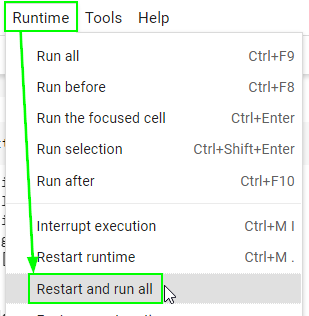

In [ ]:
print('🎯 Restart and run all successful')